In [29]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, median_absolute_error

In [30]:
model = joblib.load('../../models/rf_harvest_model.pkl')

# Carica i dati
features = pd.read_csv("../../data/processed/features.csv")

features_future = pd.read_csv("../../data/processed/features.csv")
features_future['temp_media'] += 2.5
features_future['prec_media'] *= (1 - 1.5 / 100)

# Seleziona le caratteristiche e il target
X = features_future[['alt', 'lat', 'lon', 'superficie_media', 'prec_media', 'temp_media']]

X = X.rename(columns={
    'superficie_media': 'superficie',
    'prec_media': 'prec',
    'temp_media': 'temp'
})

y = features_future['produzione_media']

# Visualizza dataset
display(X)
display(y)

,alt,lat,lon,superficie,prec,temp
0,45.0,45.359387,11.788713,18797.3125,908.403937,17.374375
1,64.0,45.312391,9.592525,3285.9375,734.120500,16.348125
2,909.0,45.900500,9.334549,359.3750,1303.216563,17.540625
3,1021.5,42.880969,11.677506,5629.4375,857.986097,17.611562
4,377.5,40.123903,8.821022,2500.1250,567.046031,19.861875
...,...,...,...,...,...,...
6665,1076.5,46.460954,13.026428,6895.7500,1335.524563,17.140000
6666,551.5,45.594785,8.088702,270.5625,1272.041313,16.933750
6667,343.5,39.310632,16.293506,7281.6250,1003.801187,18.716875
6668,688.5,41.127660,15.202556,4778.2500,1187.885375,17.966875


0       1.238952e+06
1       2.001900e+05
2       1.824081e+04
3       2.133921e+05
4       1.035767e+05
            ...     
6665    3.425376e+05
6666    1.251794e+04
6667    1.977888e+05
6668    1.617518e+05
6669    2.536100e+04
Name: produzione_media, Length: 6670, dtype: float64

In [31]:
predictions = model.predict(X)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y, predictions)

# Mean Squared Error (MSE)
mse = mean_squared_error(y, predictions)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared (R²)
r2 = r2_score(y, predictions)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y - predictions) / y)) * 100

# Explained Variance Score
evs = explained_variance_score(y, predictions)

# Max Error
max_err = max_error(y, predictions)

# Median Absolute Error
medae = median_absolute_error(y, predictions)

# Stampa tutte le metriche
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Explained Variance Score: {evs}")
print(f"Max Error: {max_err}")
print(f"Median Absolute Error: {medae}")
print(predictions)

Mean Absolute Error (MAE): 29323.132190498494
Mean Squared Error (MSE): 3559386465.7369256
Root Mean Squared Error (RMSE): 59660.593910360345
R-squared (R²): 0.9858724532041362
Mean Absolute Percentage Error (MAPE): 7.714646657754725%
Explained Variance Score: 0.9859133205281161
Max Error: 214610.01750000007
Median Absolute Error: 1326.0649999999441
[1147159.32875  111804.1775    17835.5425  ...  197788.75     161751.8125
   27115.81125]


In [32]:
difference = y - predictions

difference_df = pd.DataFrame({
    'comune': features_future['comune'],
    'differenza': difference,
    'lat': X['lat'],
    'lon': X['lon'],
    'alt': X['alt']
})

# Per semplicità di lettura
difference_df['differenza'] = difference_df['differenza'].astype(int)
display(difference_df)

,comune,differenza,lat,lon,alt
0,Abano Terme,91792,45.359387,11.788713,45.0
1,Abbadia Cerreto,88385,45.312391,9.592525,64.0
2,Abbadia Lariana,405,45.900500,9.334549,909.0
3,Abbadia San Salvatore,0,42.880969,11.677506,1021.5
4,Abbasanta,1411,40.123903,8.821022,377.5
...,...,...,...,...,...
6665,Zuglio,115668,46.460954,13.026428,1076.5
6666,Zumaglia,526,45.594785,8.088702,551.5
6667,Zumpano,0,39.310632,16.293506,343.5
6668,Zungoli,0,41.127660,15.202556,688.5


In [33]:
features_future['produzione_media'] = features_future['produzione_media'] - difference_df['differenza']

In [34]:
X_ita = features[['alt', 'lat', 'lon', 'superficie_media', 'produzione_media', 'prec_media', 'temp_media', 'superficie_std', 'produzione_std']]
X_ita_fut = features_future[['alt', 'lat', 'lon', 'superficie_media', 'produzione_media', 'prec_media', 'temp_media', 'superficie_std', 'produzione_std']]

display(X_ita)
display(X_ita_fut)

,alt,lat,lon,superficie_media,produzione_media,prec_media,temp_media,superficie_std,produzione_std
0,45.0,45.359387,11.788713,18797.3125,1.238952e+06,922.237500,14.874375,3957.771742,271951.586706
1,64.0,45.312391,9.592525,3285.9375,2.001900e+05,745.300000,13.848125,744.975209,59782.324283
2,909.0,45.900500,9.334549,359.3750,1.824081e+04,1323.062500,15.040625,71.880340,3711.860167
3,1021.5,42.880969,11.677506,5629.4375,2.133921e+05,871.051875,15.111562,2422.478482,77535.633789
4,377.5,40.123903,8.821022,2500.1250,1.035767e+05,575.681250,17.361875,2202.084645,93583.946085
...,...,...,...,...,...,...,...,...,...
6665,1076.5,46.460954,13.026428,6895.7500,3.425376e+05,1355.862500,14.640000,2415.421523,162604.442614
6666,551.5,45.594785,8.088702,270.5625,1.251794e+04,1291.412500,14.433750,107.793611,5302.625029
6667,343.5,39.310632,16.293506,7281.6250,1.977888e+05,1019.087500,16.216875,2362.327549,55901.761236
6668,688.5,41.127660,15.202556,4778.2500,1.617518e+05,1205.975000,15.466875,829.189765,50037.742894


,alt,lat,lon,superficie_media,produzione_media,prec_media,temp_media,superficie_std,produzione_std
0,45.0,45.359387,11.788713,18797.3125,1.147160e+06,908.403937,17.374375,3957.771742,271951.586706
1,64.0,45.312391,9.592525,3285.9375,1.118050e+05,734.120500,16.348125,744.975209,59782.324283
2,909.0,45.900500,9.334549,359.3750,1.783581e+04,1303.216563,17.540625,71.880340,3711.860167
3,1021.5,42.880969,11.677506,5629.4375,2.133921e+05,857.986097,17.611562,2422.478482,77535.633789
4,377.5,40.123903,8.821022,2500.1250,1.021657e+05,567.046031,19.861875,2202.084645,93583.946085
...,...,...,...,...,...,...,...,...,...
6665,1076.5,46.460954,13.026428,6895.7500,2.268696e+05,1335.524563,17.140000,2415.421523,162604.442614
6666,551.5,45.594785,8.088702,270.5625,1.199194e+04,1272.041313,16.933750,107.793611,5302.625029
6667,343.5,39.310632,16.293506,7281.6250,1.977888e+05,1003.801187,18.716875,2362.327549,55901.761236
6668,688.5,41.127660,15.202556,4778.2500,1.617518e+05,1187.885375,17.966875,829.189765,50037.742894


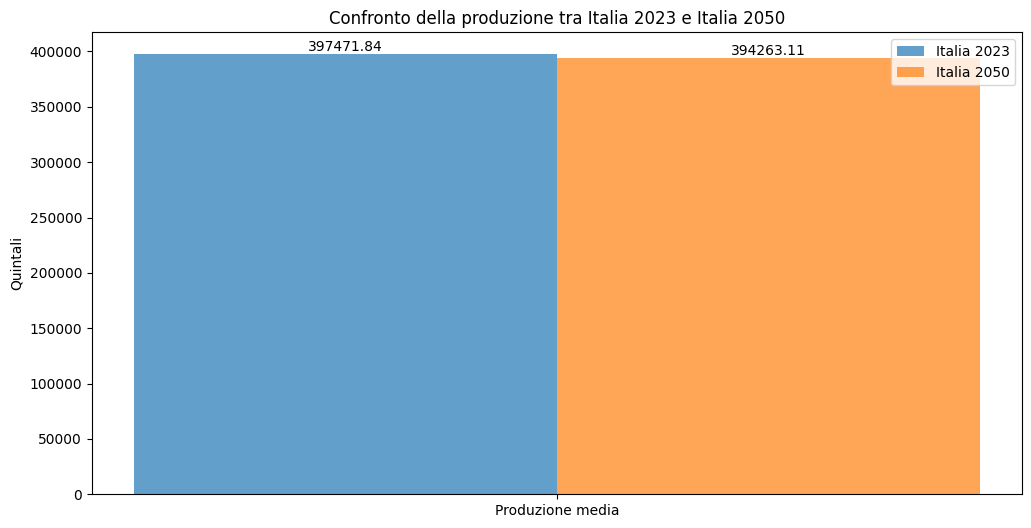

In [35]:
# Imposta la dimensione della figura
plt.figure(figsize=(12, 6))

# Larghezza delle barre
bar_width = 0.35

# Etichette dell'asse x per la produzione media
x_labels1 = ['Produzione media']

# Dati medi per la produzione media di Italia 2023 e 2050
italia2023_means1 = [X_ita['produzione_media'].mean()]
italia2050_means1 = [X_ita_fut['produzione_media'].mean()]

# Posizione per le barre
x1 = range(len(x_labels1))  # Crea una lista con una sola posizione

# Disegna le barre solo per la produzione media
bars_2023 = plt.bar([p - bar_width/2 for p in x1], italia2023_means1, width=bar_width, label='Italia 2023', alpha=0.7)
bars_2050 = plt.bar([p + bar_width/2 for p in x1], italia2050_means1, width=bar_width, label='Italia 2050', alpha=0.7)

# Aggiunge le etichette dell'asse x
plt.xticks(x1, x_labels1)

# Etichetta per l'asse y e titolo del grafico
plt.ylabel('Quintali')
plt.title('Confronto della produzione tra Italia 2023 e Italia 2050')

# Aggiungi la legenda
plt.legend()

# Aggiungi i valori sopra le barre
for bar in bars_2023:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}', 
             ha='center', va='bottom')

for bar in bars_2050:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}', 
             ha='center', va='bottom')

# Mostra il grafico
plt.show()

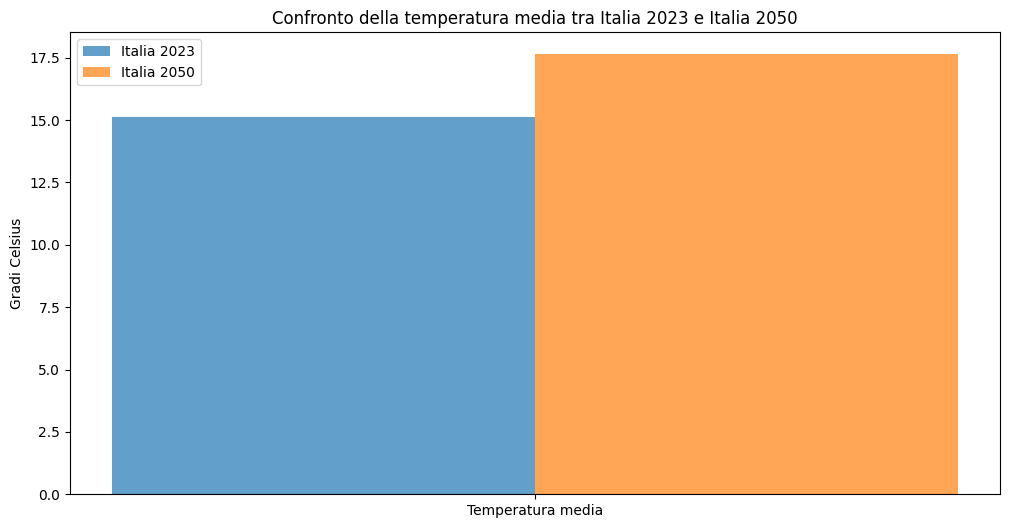

In [36]:
# Grafico a barre per Temperatura Media
plt.figure(figsize=(12, 6))

# Etichette per la temperatura media
x_labels_temp = ['Temperatura media']

# Dati medi per la temperatura
italia_temp_mean = [X_ita['temp_media'].mean()]
spagna_temp_mean = [X_ita_fut['temp_media'].mean()]

# Posizione per la barra della temperatura
x_temp = range(len(x_labels_temp))

# Disegna le barre per la temperatura
plt.bar([p - bar_width/2 for p in x_temp], italia_temp_mean, width=bar_width, label='Italia 2023', alpha=0.7)
plt.bar([p + bar_width/2 for p in x_temp], spagna_temp_mean, width=bar_width, label='Italia 2050', alpha=0.7)

# Etichette asse x e y
plt.xticks(x_temp, x_labels_temp)
plt.ylabel('Gradi Celsius')
plt.title('Confronto della temperatura media tra Italia 2023 e Italia 2050')
plt.legend()

# Mostra il grafico
plt.show()


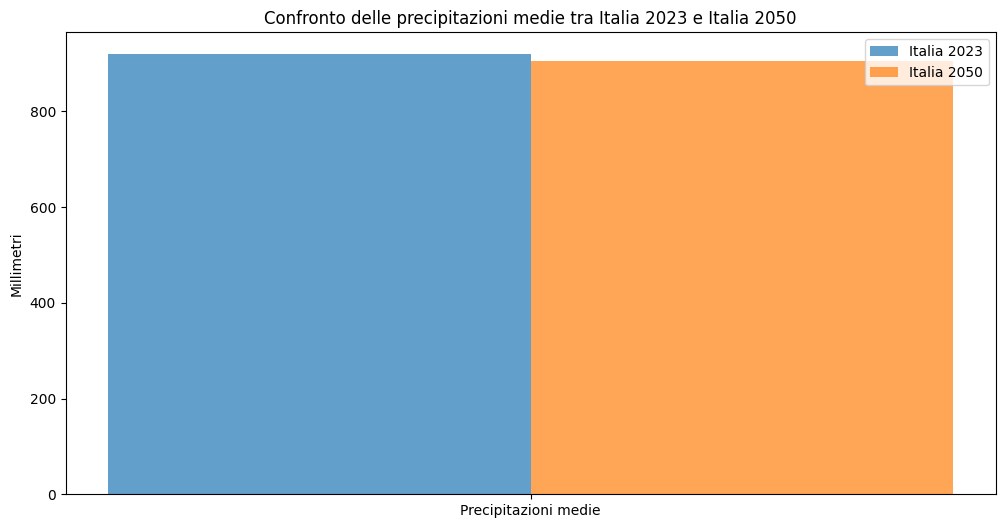

In [37]:
# Grafico a barre per Precipitazioni Medie
plt.figure(figsize=(12, 6))

# Etichette per le precipitazioni medie
x_labels_prec = ['Precipitazioni medie']

# Dati medi per le precipitazioni
italia_prec_mean = [X_ita['prec_media'].mean()]
spagna_prec_mean = [X_ita_fut['prec_media'].mean()]

# Posizione per la barra delle precipitazioni
x_prec = range(len(x_labels_prec))

# Disegna le barre per le precipitazioni
plt.bar([p - bar_width/2 for p in x_prec], italia_prec_mean, width=bar_width, label='Italia 2023', alpha=0.7)
plt.bar([p + bar_width/2 for p in x_prec], spagna_prec_mean, width=bar_width, label='Italia 2050', alpha=0.7)

# Etichette asse x e y
plt.xticks(x_prec, x_labels_prec)
plt.ylabel('Millimetri')
plt.title('Confronto delle precipitazioni medie tra Italia 2023 e Italia 2050')
plt.legend()

# Mostra il grafico
plt.show()


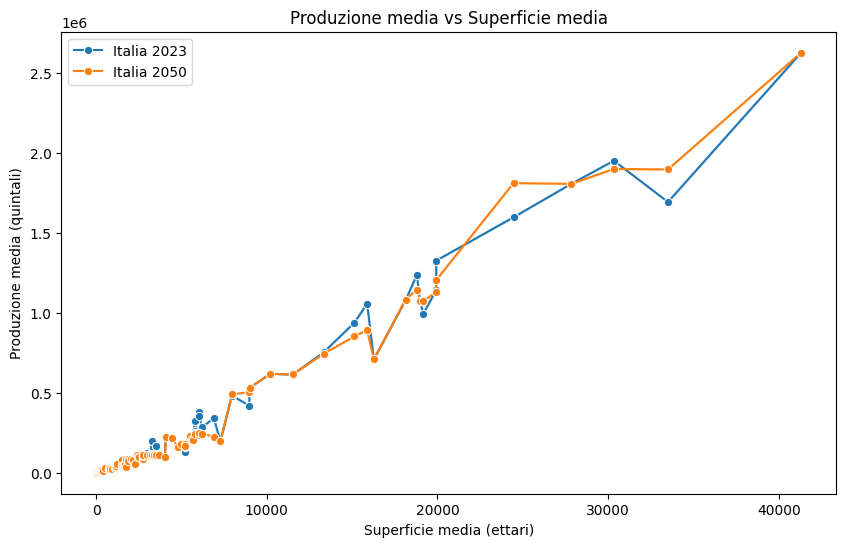

In [38]:
plt.figure(figsize=(10, 6))

# Grafico a linee per Italia
sns.lineplot(data=X_ita, x='superficie_media', y='produzione_media', label='Italia 2023', marker='o')

# Grafico a linee per Spagna
sns.lineplot(data=X_ita_fut, x='superficie_media', y='produzione_media', label='Italia 2050', marker='o')

plt.title('Produzione media vs Superficie media')
plt.xlabel('Superficie media (ettari)')
plt.ylabel('Produzione media (quintali)')
plt.legend()
plt.show()